<a href="https://colab.research.google.com/github/Prerna99-star/Fraud-Detection/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=4069a23a62ca63934a9dc1fcb7d5b7a969443b9f5885fdd9ae05282bfc208a5c
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built MiniSom


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing datasets

In [4]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [5]:
print(y)

[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 

Feature Scalling

In [7]:
from sklearn.preprocessing import MinMaxScaler
Sc = MinMaxScaler(feature_range = (0,1))
X = Sc.fit_transform(X)
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


# Training SOM

In [0]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len= 15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# Visualizing Results

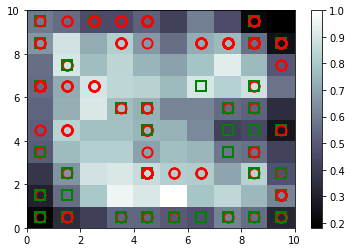

In [18]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# red circles for customers who didnt get approval and green squares for the customer who got the approval
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5,                # +0.5 as to get the circle or the square at the center of the grid
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()   

# Finding the frauds

In [31]:
mappings = som.win_map(X)
fraud = np.concatenate((mappings[(8,6)], mappings[(8,2)]), axis = 0)
fraud = Sc.inverse_transform(fraud)
print(fraud)

[[6.08659787e-02 1.00000000e+00 5.80150376e-01 4.91071429e-02
  0.00000000e+00 5.38461538e-01 8.75000000e-01 3.31929825e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  5.00000000e-01 1.00000000e-01 1.00000000e-03]
 [4.50472312e-01 1.00000000e+00 4.27368421e-01 1.80000000e-01
  5.00000000e-01 7.69230769e-01 8.75000000e-01 4.47368421e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  5.00000000e-01 4.60000000e-02 0.00000000e+00]
 [3.96033300e-01 1.00000000e+00 2.92030075e-01 3.71428571e-02
  5.00000000e-01 8.46153846e-01 8.75000000e-01 2.28070175e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  5.00000000e-01 8.20000000e-02 3.12850000e-01]
 [1.69271490e-01 1.00000000e+00 4.08571429e-01 8.03571429e-02
  0.00000000e+00 1.00000000e+00 8.75000000e-01 3.50877193e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  5.00000000e-01 8.80000000e-02 0.00000000e+00]
 [1.01682224e-01 1.00000000e+00 2.74436090e-01 6.25000000e-02
  